# Group Discussion
จากข้อมูลการขายใน superstore แห่งหนึ่งใน USA ห้นิสิตทำการสำรวจข้อมูลเบื้องต้น และทำการค้นหา Insight ที่น่าสนใจ มา 1 insight 
* ค่าตัวแปรต่างๆ ใน column จะมีดังนี้ Segment(กลุ่มของลูกค้า), Country, City, State, Postal 
Code, Region, Category, Sub-Category, Sales, Quantity, Discount, Profit 

In [ ]:
import pandas as pd
df = pd.read_csv('superstore.csv')
df.sample(5)

,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7498,Consumer,United States,Westminster,California,92683,West,Office Supplies,Art,71.920,4,0.0,20.8568
8020,Consumer,United States,Saint Louis,Missouri,63116,Central,Office Supplies,Paper,11.760,2,0.0,5.7624
1709,Consumer,United States,San Francisco,California,94122,West,Furniture,Chairs,71.992,1,0.2,-0.8999
2555,Consumer,United States,New York City,New York,10035,East,Technology,Accessories,50.000,2,0.0,12.0000
7448,Consumer,United States,Knoxville,Tennessee,37918,South,Furniture,Furnishings,88.920,5,0.2,14.4495


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Segment       9994 non-null   object 
 1   Country       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Postal Code   9994 non-null   int64  
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 937.1+ KB


In [ ]:
df.describe()
#df.describe().loc[['count','mean','std','min','max'],:]

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.857901,3.789574,0.156203,28.656599
std,32063.693350,623.245124,2.225110,0.206452,234.260115
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.describe(include = 'object')

,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994
unique,3,1,531,49,4,3,17
top,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5191,9994,915,2001,3203,6026,1523


Consumer       0.519412
Corporate      0.302181
Home Office    0.178407
Name: Segment, dtype: float64
Office Supplies    0.602962
Furniture          0.212227
Technology         0.184811
Name: Category, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


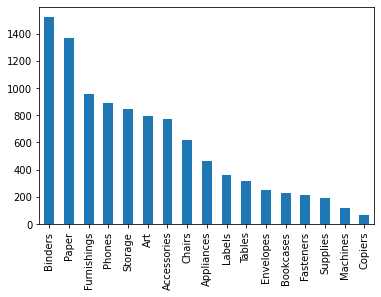

In [ ]:
# สำรวจสัดส่วนของ Segment, Category และ Sub- Category 


                  Profit  Quantity         Sales
Segment                                         
Consumer     134116.2384     19521  1.161400e+06
Corporate     91979.1340     11608  7.061464e+05
Home Office   60298.6785      6744  4.296531e+05
All          286394.0509     37873  2.297200e+06


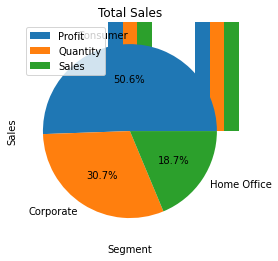

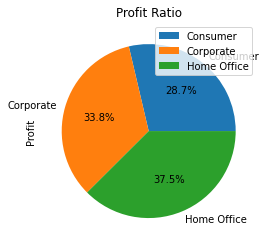

In [ ]:
# Identify Key Segment 

#Find Total Sales, Profit and Quantity

# Find the proportion of total sales by segment

# what is the proportion of profit ratio by segment



                       Sales
Category                    
Furniture        741998.7953
Office Supplies  719047.0320
Technology       836154.0330


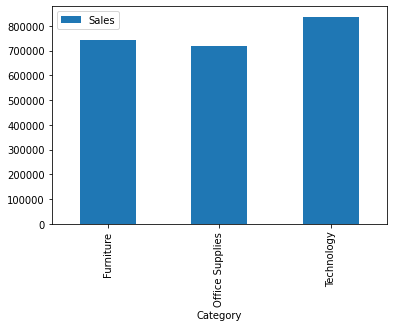

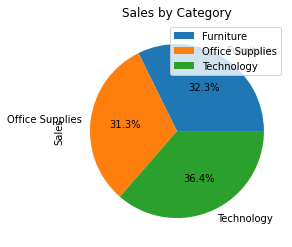

In [ ]:
# Identify Key Categories

print(df[['Category', 'Sales']].groupby('Category').sum())
#print(df.filter(['Category', 'Sales']).groupby('Category').sum())

df[['Category', 'Sales']].groupby('Category').sum().plot.bar()
df[['Category', 'Sales']].groupby('Category').sum().plot.pie(y='Sales', autopct='%.1f%%', title='Sales by Category')
# The 3 categories are similar in proportion of sales.


                      Profit
Category                    
Furniture         18451.2728
Office Supplies  122490.8008
Technology       145451.9773


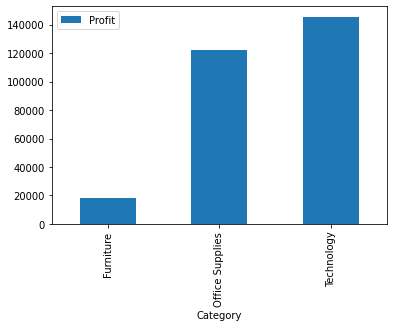

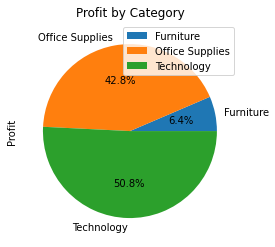

In [ ]:
print(df.filter(['Category', 'Profit']).groupby('Category').sum())
df.filter(['Category', 'Profit']).groupby('Category').sum().plot.bar()
df.filter(['Category', 'Profit']).groupby('Category').sum().plot.pie(y='Profit', autopct='%.1f%%', title='Profit by Category')
# Office Supply and Technology make up over 90% (approx) of our profit (profit driver) 
# df.pivot_table(['Sales','Profit'],index=['Category'],aggfunc=sum).plot.bar()

                    Profit
Category                  
Furniture         8.699327
Office Supplies  20.327050
Technology       78.750394


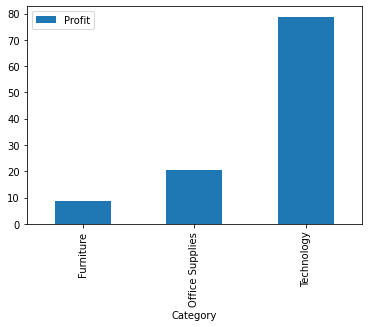

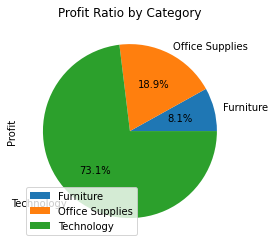

In [ ]:
# let' s deep dive into these 2 profit drivers
print(df.filter(['Category', 'Profit']).groupby('Category').mean())
df.filter(['Category', 'Profit']).groupby('Category').mean().plot.bar()
df.filter(['Category', 'Profit']).groupby('Category').mean().plot.pie(y='Profit', autopct='%.1f%%', title='Profit Ratio by Category')

In [ ]:
# explore each average sales' transaction by categories
print(df.groupby(["Category"])['Sales'].mean())

Category
Furniture          349.834416
Office Supplies    119.324101
Technology         452.709276
Name: Sales, dtype: float64


In [ ]:
print(df.groupby(["Category","Sub-Category"]).agg({'Sales':'sum','Quantity':'sum'}))
#df.groupby(["Category","Sub-Category"]).agg({'Sales':'sum','Quantity':'sum'}).unstack().plot(kind='bar',figsize=(20,10))
df1 = df.groupby(["Category","Sub-Category"]).agg({'Sales':'sum','Quantity':'sum'})
df1['Sales']/df1['Quantity'] *100

                                    Sales  Quantity
Category        Sub-Category                       
Furniture       Bookcases     114879.9963       868
                Chairs        328449.1030      2356
                Furnishings    91705.1640      3563
                Tables        206964.5320      1241
Office Supplies Appliances    107532.1610      1729
                Art            27118.7920      3000
                Binders       203412.7330      5974
                Envelopes      16476.4020       906
                Fasteners       3024.2800       914
                Labels         12486.3120      1400
                Paper          78479.2060      5178
                Storage       223843.6080      3158
                Supplies       46673.5380       647
Technology      Accessories   167380.3180      2976
                Copiers       149528.0300       234
                Machines      189238.6310       440
                Phones        330007.0540      3289


Category         Sub-Category
Furniture        Bookcases       13235.022615
                 Chairs          13940.963625
                 Furnishings      2573.818804
                 Tables          16677.238678
Office Supplies  Appliances       6219.326836
                 Art               903.959733
                 Binders          3404.967074
                 Envelopes        1818.587417
                 Fasteners         330.884026
                 Labels            891.879429
                 Paper            1515.627771
                 Storage          7088.144649
                 Supplies         7213.838949
Technology       Accessories      5624.338642
                 Copiers         63900.867521
                 Machines        43008.779773
                 Phones          10033.659289
dtype: float64

* ราคาต่อชิ้นโดยเฉลี่ยของสินค้า tech มีราคาสูงที่สุด ต่ำสุดคือ office suppliers
* กลุ่ม techology โดยเฉลี่ยทำกำไรได้มากที่สุดแต่มีการซื้อจำนวนน้อย เพราะสินค้ามีราคาเฉลี่ยต่อชิ้นสูง 
* กลุ่ม office supplier มีการซื้อจำนวนมากที่สุดเท่าๆกับ กลุ่ม Tech แต่ได้กำไรเฉลี่ยตำ่กว่า 
* กลุ่ม furniture มีการซื้อจำนวนน้อย นอกจากนั้นโดยเฉลี่ยทำกำไรน้อย 

## Insight1: which product categories/subcategories we want to push or fix, in what area? 

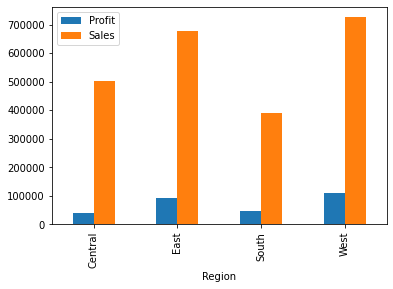

In [ ]:
# Find Total Profit and Total Sales by Region


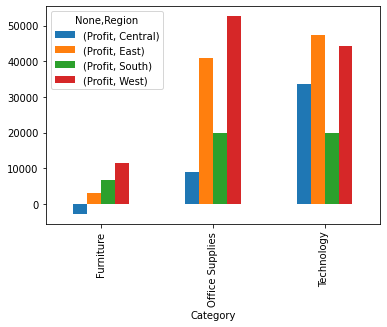

In [ ]:
# Find Total Profit of each category broken down by region


                                   Sales  Quantity  Discount      Profit
Category        Sub-Category                                            
Furniture       Bookcases     24157.1768       192     11.64  -1997.9043
                Chairs        85230.6460       615     29.70   6592.7221
                Furnishings   15254.3700       758     82.80  -3906.2168
                Tables        39154.9710       262     18.90  -3559.6504
Office Supplies Appliances    23582.0330       470     55.20  -2638.6175
                Art            5765.3400       678     21.60   1195.1591
                Binders       56923.2820      1473    186.40  -1043.6369
                Envelopes      4636.8720       206      7.60   1777.5283
                Fasteners       778.0300       227      7.40    236.6186
                Labels         2451.4720       284      8.60   1073.0794
                Paper         17491.9020      1225     41.40   6971.9005
                Storage       45930.1120       724 

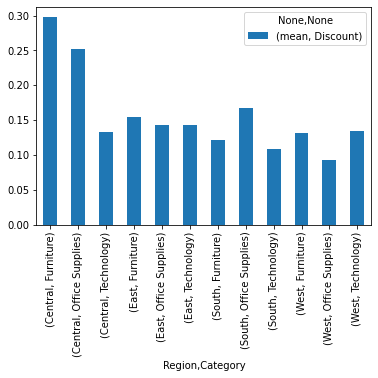

In [ ]:
# ที่ Central ทำไม Furniture ถึงขาดทุนและ กับ Office Supplied ไม่ทำกำไรเท่าที่ควร
# เป็นที่ discount หรือเปล่า ลองสำรวจการ total discount ของ 'Category' และ 'Sub-Category' ที่ central
print(df[df['Region']=='Central'].groupby(['Category','Sub-Category']).sum()[['Sales','Quantity','Discount','Profit']])
df1 = df.groupby(['Category','Sub-Category']).sum()[['Sales','Quantity','Discount','Profit']]
df1['Discount']/df1['Sales'] *100
# Insight: so to improve furniture we could furthur explore What discount rate is appropriate to make profit?
# compare average discount with other region?
df.pivot_table(values = ["Discount"], index = ["Region", "Category"], aggfunc = ["mean"]).plot.bar()

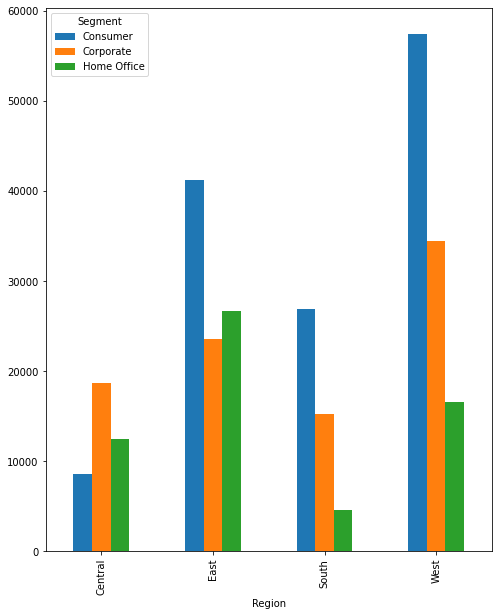

In [ ]:
# ขาดทุนใน segment ไหน 
# Find total profit in each region broken down by segments
df.pivot_table('Profit',index='Region',columns=['Segment'],aggfunc={'Profit':'sum'}).plot.bar(figsize=(8,10))
#Consumer ที่ central น่าจะทำได้ดีกว่านี้

In [ ]:
df[df['Region']=='Central'].pivot_table('Profit',index=['Category', 'Sub-Category']
                                        , columns='Segment', aggfunc='sum', margins=True)
# Furnishing, bookcase น่าจะหยุด,  Table น่าจะดูว่าทำไมขาดทุน น่าจะ explore ใน region อื่นด้วย 
# Office supplied ตรง appliance ขาดทุนหนักมาก หยุดหรือไปต่อดี

Segment                        Consumer   Corporate  Home Office         All
Category        Sub-Category                                                
Furniture       Bookcases    -1497.1260   -382.7121    -118.0662  -1997.9043
                Chairs        2920.9013   3206.8837     464.9371   6592.7221
                Furnishings  -1454.0524  -1209.3583   -1242.8061  -3906.2168
                Tables       -3964.1571    707.1806    -302.6739  -3559.6504
Office Supplies Appliances   -3775.6065   -459.2306    1596.2196  -2638.6175
                Art            605.5615    343.9693     245.6283   1195.1591
                Binders       1832.3210  -4420.4249    1544.4670  -1043.6369
                Envelopes      912.6616    483.6642     381.2025   1777.5283
                Fasteners      128.1477     78.5563      29.9146    236.6186
                Labels         334.2023    487.1700     251.7071   1073.0794
                Paper         2914.6377   2399.2305    1658.0323   6971.9005
                Storage        413.3101   1084.5102     472.0162   1969.8365
                Supplies      -782.0922    101.8498      18.3543   -661.8881
Technology      Accessories   3743.3859   1462.9337    2045.3110   7251.6306
                Copiers       1482.9616  12789.9043    1335.9754  15608.8413
                Machines     -1667.0280   -361.5044     542.4658  -1486.0666
                Phones        6414.0196   2391.2797    3515.7274  12321.0267
All                           8562.0481  18703.9020   12438.4124  39704.3625

In [ ]:
# table ขาดทุนใน region ไหน 
df.pivot_table('Profit',index=['Category', 'Sub-Category'], columns=['Segment','Region'],margins=True)
# table น่าจะหยุด แต่อาจจะขายที่ west bookcase น่าจะไปสำรวจที่ south ว่าทำไมขาย consumer ได้ดี

Segment                         Consumer              ... Home Office         All
Region                           Central        East  ...        West            
Category        Sub-Category                          ...                        
Furniture       Bookcases     -62.380250  -56.206851  ...   30.192055  -15.230509
                Chairs         36.060510   52.312715  ...   40.410089   43.095894
                Furnishings   -13.463448   22.052095  ...   26.656195   13.645918
                Tables        -94.384693 -112.374327  ...   -6.680282  -55.565771
Office Supplies Appliances    -57.206159   75.890271  ...   51.239146   38.922758
                Art             6.442144    8.453540  ...    6.396604    8.200737
                Binders         9.493891   28.322142  ...   34.439285   19.843574
                Envelopes      31.471090   22.612300  ...   17.969111   27.418019
                Fasteners       4.271590    5.143897  ...    1.216212    4.375660
                Labels         10.127342   11.643317  ...   11.558940   15.236962
                Paper          18.804114   20.948293  ...   29.422503   24.856620
                Storage         3.473194   17.315125  ...   33.988177   25.152277
                Supplies      -39.104610  -33.475306  ...    3.176433   -6.258418
Technology      Accessories    37.063227   48.972694  ...   54.642124   54.110535
                Copiers       370.740400  721.494375  ...  795.585440  817.909190
                Machines     -208.378500  -68.215000  ... -471.572675   29.432669
                Phones         61.085901   52.344669  ...   40.719673   50.071688
All                             7.064396   28.040153  ...   28.949939   28.656599

[18 rows x 13 columns]

                 Discount     Profit  Quantity       Sales
Category                                                  
Technology       0.132323  78.750394  3.756903  452.709276
Furniture        0.173923   8.699327  3.785007  349.834416
Office Supplies  0.157285  20.327050  3.801195  119.324101


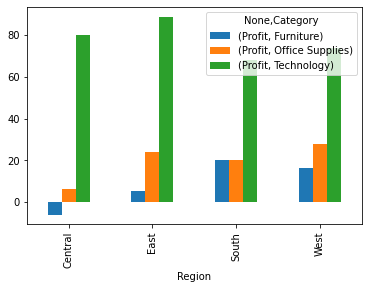

In [ ]:
# office supplied อาจจะไปต่อได้ ถ้าเรียนรู้จาก region อื่น
print(df.pivot_table(['Sales','Profit','Quantity','Discount'],df[['Category']]).sort_values(by='Sales',ascending=False))
df.pivot_table(['Profit'],index=['Region'],columns=['Category']).plot(kind='bar')

## Boosting the product

                   Sales                                          
Category       Furniture Office Supplies  Technology           All
Segment                                                           
Consumer     391048.3120      363952.136  406399.897  1.161400e+06
Corporate    229019.7858      230676.462  246450.119  7.061464e+05
Home Office  121930.6975      124418.434  183304.017  4.296531e+05
All          741998.7953      719047.032  836154.033  2.297200e+06


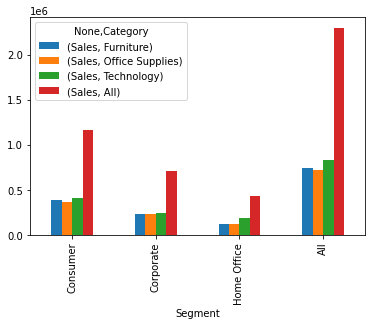

In [ ]:
# Total Sales by Segments broken dowm by Category 
print(df.pivot_table(['Sales'],columns=['Category'],index=['Segment'],aggfunc=sum,margins=True))
df.pivot_table(['Sales'],columns=['Category'],index=['Segment'],aggfunc=sum,margins=True).plot.bar()
# Home Office customers are keen on technology products. The rest are fairly similar.

In [ ]:
# เนื่องจากสาขา east ทำกำไรจาก segment home office ได้ดีมากและ technology เป็น product category ที่เป็นที่ยอดนิยม จึงลงไป explore สาขา east
df[(df['Region']=='East')&(df['Category']=='Technology')].pivot_table('Profit',index=['Sub-Category'], columns='Segment',margins=True)
# also boost in copiers and machine

Segment,Consumer,Corporate,Home Office,All
Sub-Category,,,,
Accessories,48.972694,52.385555,70.283605,54.348856
Copiers,721.494375,283.744125,1807.483200,851.142090
Machines,-68.215000,218.716858,933.354267,187.260619
Phones,52.344669,35.972624,41.262536,45.274581
All,71.691293,61.778542,180.704770,88.714084


In [ ]:
df[(df['Region']=='East')&((df['Sub-Category']=='Machines')|(df['Sub-Category']=='Copiers'))].pivot_table(['Profit','Sales'],index=['City','State']).sort_values(['Profit','Sales'], ascending=False)
# also start some campaign in copiers and machine in the top 5 cities

,,Profit,Sales
City,State,,
Providence,Rhode Island,2591.956800,5399.910000
Newark,Delaware,2535.495750,5282.970000
Lakewood,New Jersey,2365.981800,9099.930000
Yonkers,New York,1212.544050,2476.185000
New York City,New York,1128.821017,3013.948111
Warwick,Rhode Island,899.982000,1999.960000
Washington,District of Columbia,648.562400,1379.920000
Lawrence,Massachusetts,467.992200,1199.980000
Oceanside,New York,296.067100,629.930000


In [ ]:
df[df['Region']=='West'].pivot_table('Profit',index=['Category','Sub-Category'], columns='Segment',margins=True)
# also boost in copiers 

Segment                         Consumer   Corporate  Home Office         All
Category        Sub-Category                                                 
Furniture       Bookcases     -40.131776   -0.608365    30.192055  -20.581396
                Chairs         13.663373   17.369444    40.410089   19.456929
                Furnishings    26.161623   21.732497    26.656195   25.135758
                Tables          9.157398   25.576200    -6.680282   12.781097
Office Supplies Appliances     65.053236   59.522104    51.239146   60.744632
                Art             8.906038   13.391169     6.396604    9.496388
                Binders        32.935622   35.977247    34.439285   34.175800
                Envelopes      27.612589   33.939122    17.969111   28.488991
                Fasteners       4.409731    5.331262     1.216212    3.822093
                Labels         18.529417   27.411824    11.558940   19.854503
                Paper          24.212667   30.103060    29.422503   26.931636
                Storage        25.352956   45.940617    33.988177   32.501211
                Supplies        7.072419   14.464476     3.176433    9.073138
Technology      Accessories    68.947541   60.761372    54.642124   63.890029
                Copiers       810.591420  638.087320   795.585440  773.089404
                Machines      115.453474   80.003250  -471.572675  -15.869908
                Phones         32.383549   29.148973    40.719673   32.890768
All                            34.359828   35.872323    28.949939   33.848729

#Insight2: What discount rate is appropriate to make profit? (need to do modelling)

# Insight 3: Why south region which is quite similar sales to centrol make profit about office supplies? (need gathering data and modelling)